<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/040_intro_seaborn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(intro-seaborn-notebook)=
# Seaborn

Nel capitolo precedente abbiamo introdotto Matplotlib. La libreria Seaborn è un complemento di Matplotlib e consente di generare in maniera molto semplice varie visualizzazioni dei dati utili per la data science. Per un approfondimento, è possibile consultare i tutorial sulla pagina web di [Seaborn](https://seaborn.pydata.org/). 

Esaminiamo qui alcuni esempi.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

sns.set_theme(palette="colorblind")

Consideriamo nuovamente i dati Palmer penguin.

In [4]:
df = pd.read_csv("../data/penguins.csv")

## Visualizzare la distribuzione dei dati

Una delle rappresentazioni grafiche dei dati che si usano più spesso è l'istogramma, o l'istogramma lisciato. Possiamo creare un istogramma o un kde plot direttamente da pandas:

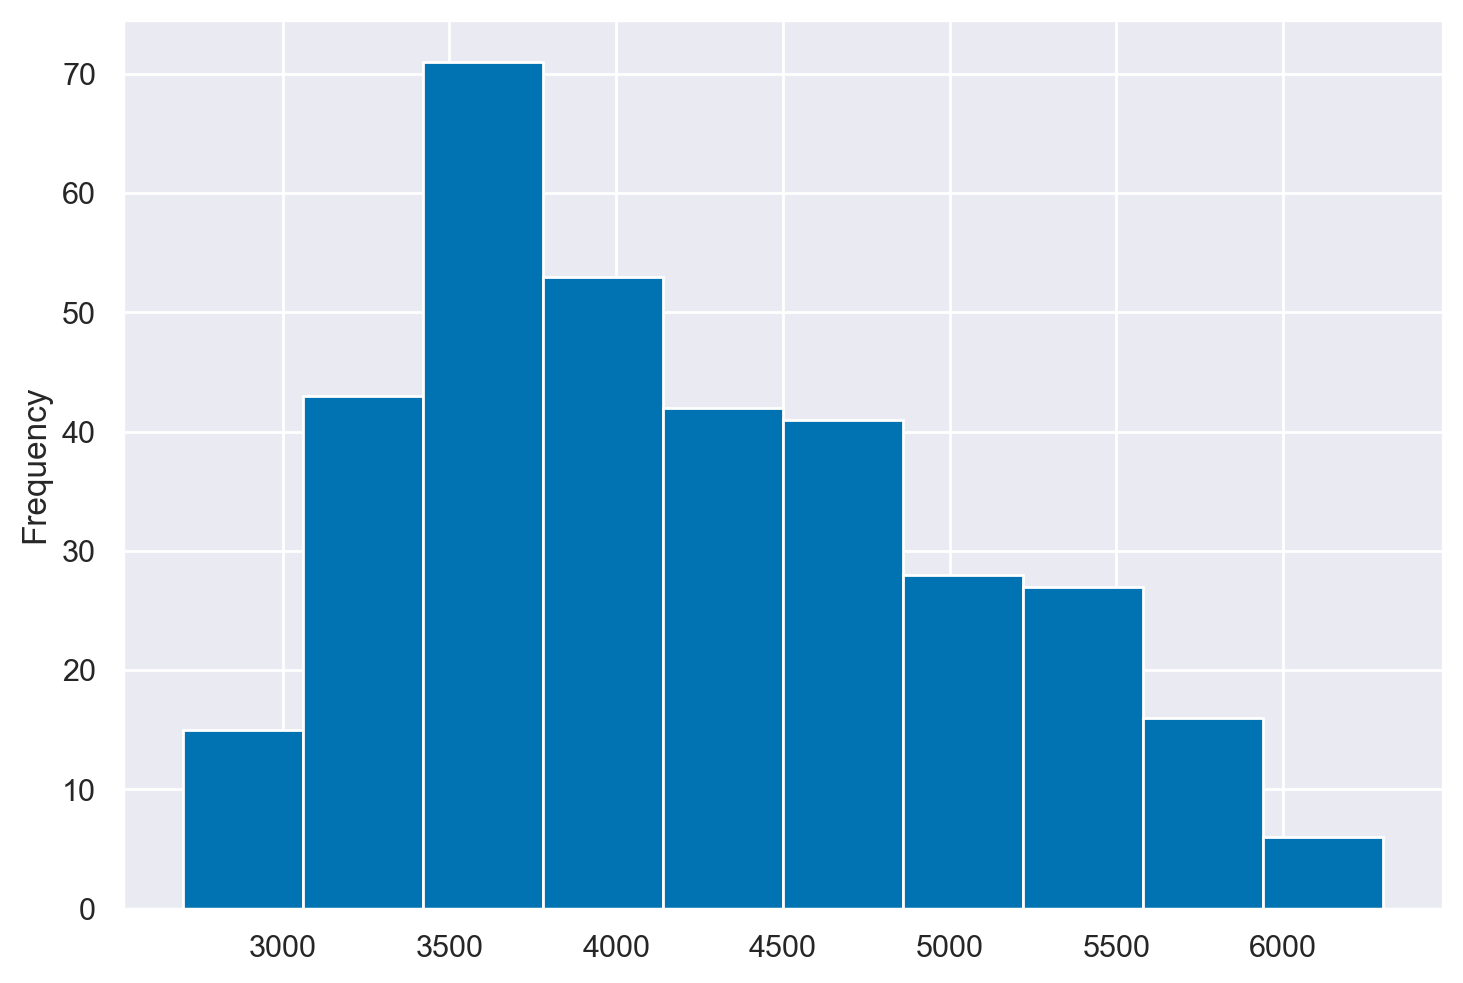

In [5]:
_ = df["body_mass_g"].plot.hist()

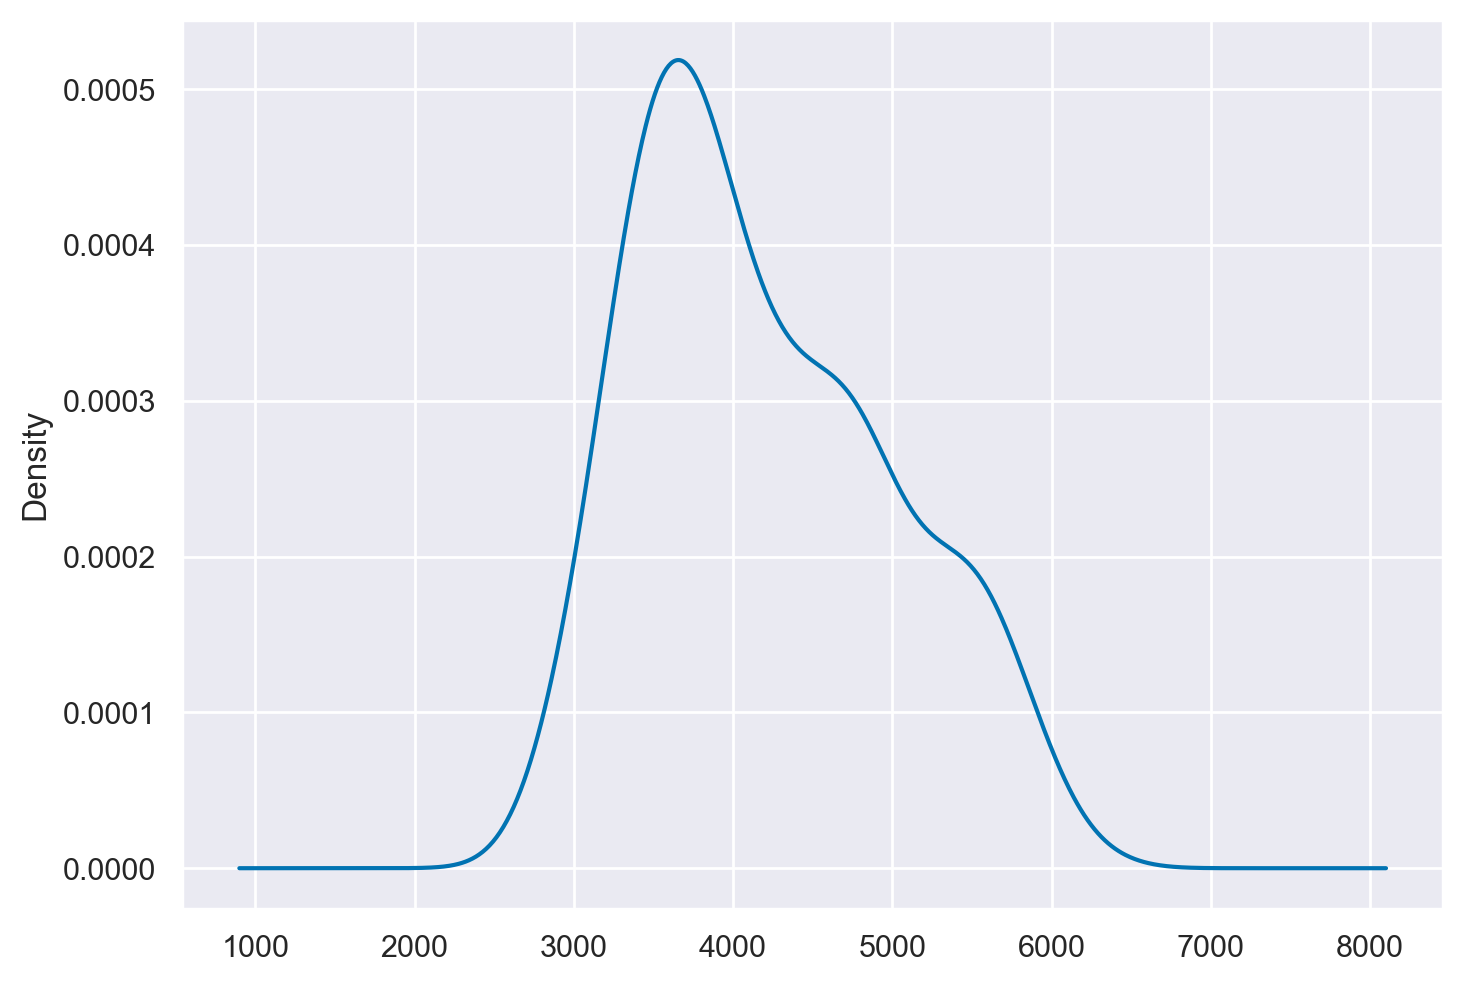

In [9]:
_ = df["body_mass_g"].plot.kde(bw_method=0.3)

Oppure possiamo usare Seaborn:

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


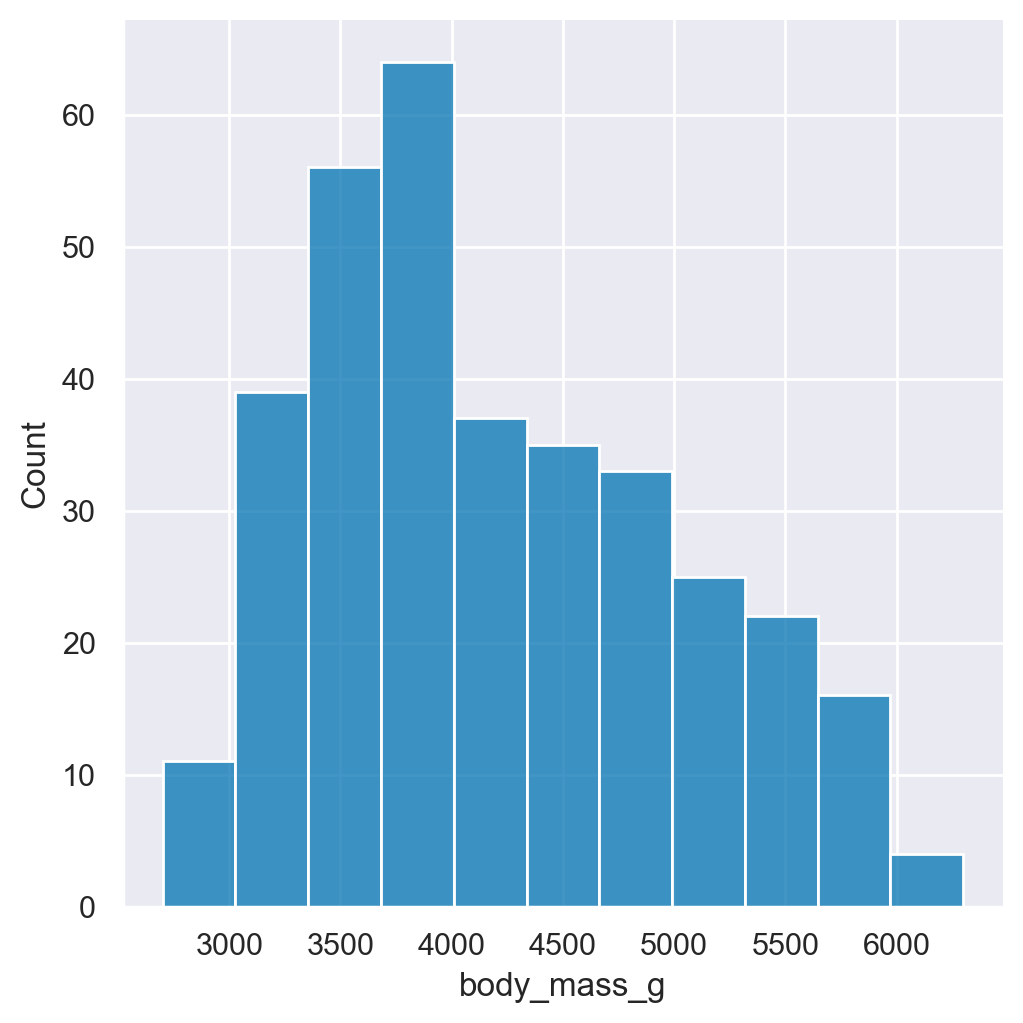

In [10]:
_ = sns.displot(df, x="body_mass_g")

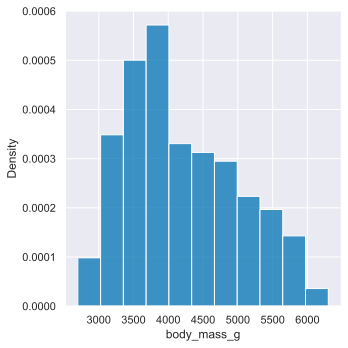

In [7]:
_ = sns.displot(df, x="body_mass_g", stat="density")

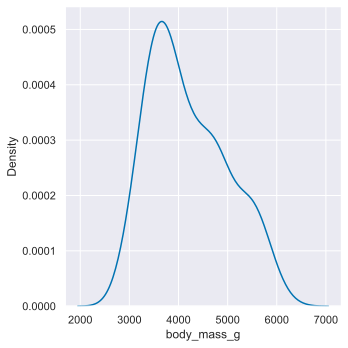

In [8]:
_ = sns.displot(df, x="body_mass_g", kind="kde")

Seaborn offre maggiore flessibilità rispetto a Pandas. Per esempio, possiamo creare un istogramma lisciato di `body_massg` in base alla `species`:

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


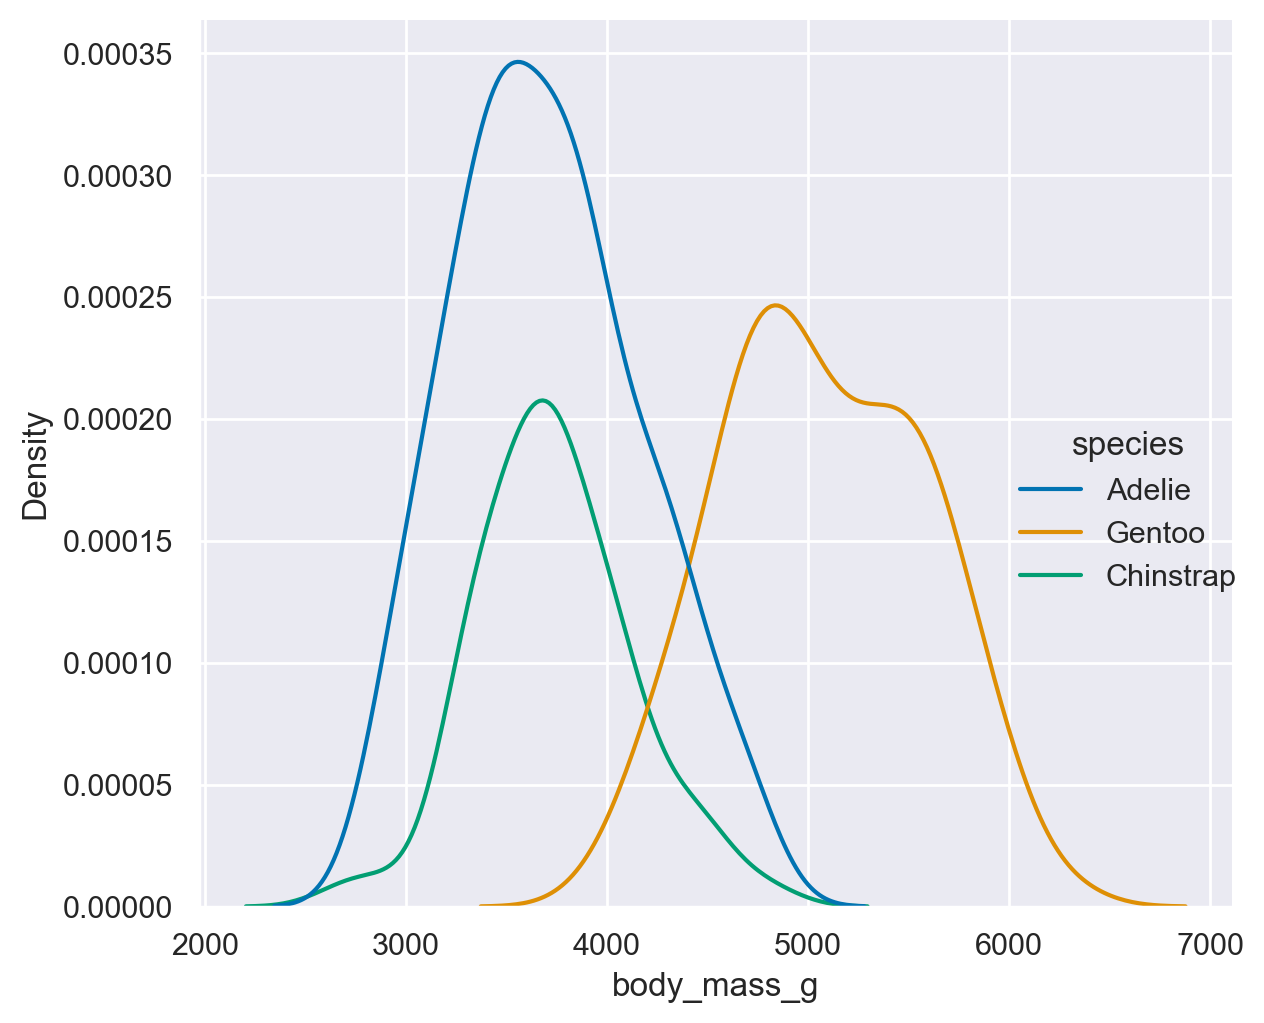

In [11]:
_ = sns.displot(
    df, x="body_mass_g", hue="species", kind="kde"
)

## Visualizzazione di dati categoriali

Consideriamo ora il caso in cui si vuole rappresentare la relazione tra una variabile numerica e una variabile categoriale. 

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


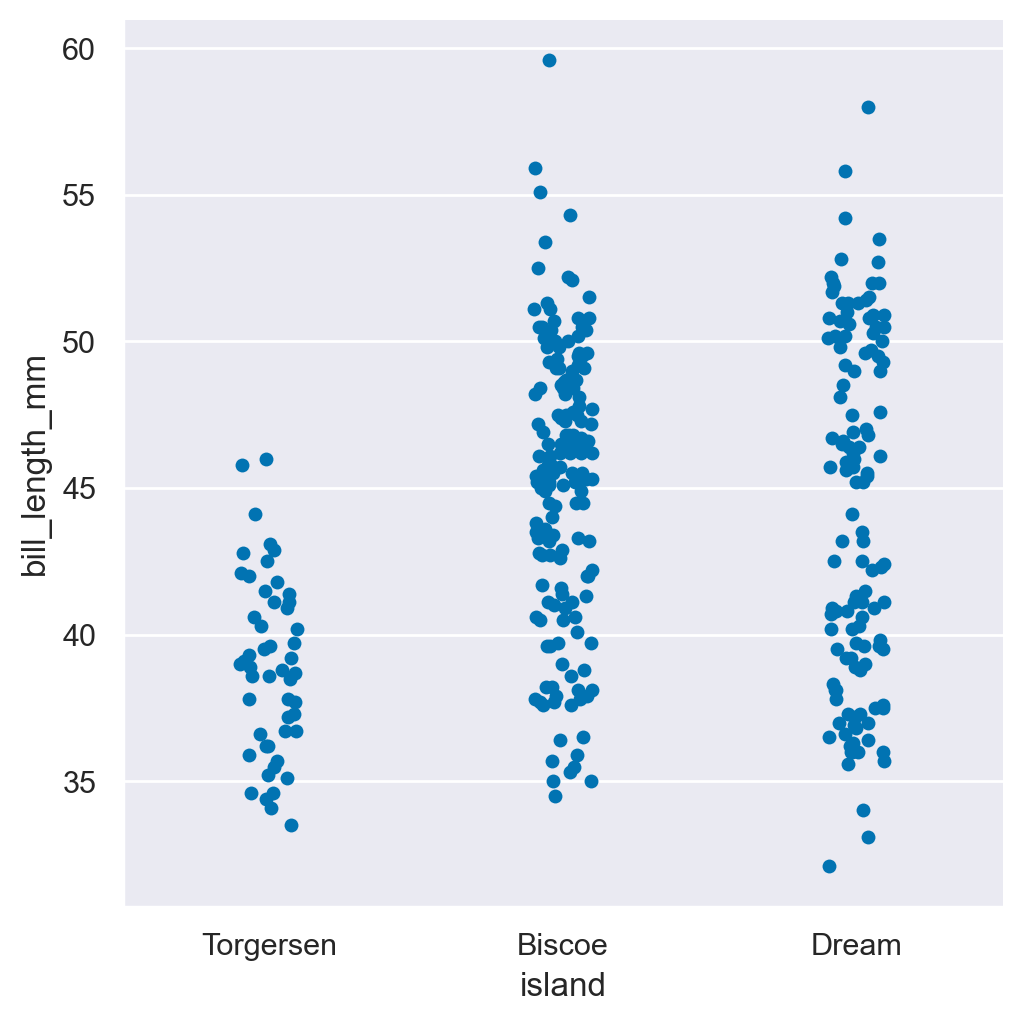

In [12]:
_ = sns.catplot(data=df, x="island", y="bill_length_mm")

I dati rivelano che:

- La specie Adelie è presente in tutte e tre le isole.
- La specie Gentoo è limitata a Biscoe.
- Le specie Gentoo e Chinstrap presentano becchi più lunghi rispetto ad Adelie.

Procediamo ora con l'analisi della massa corporea in relazione alla specie, differenziando le osservazioni per genere. Creeremo il grafico utilizzando i boxplot.

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


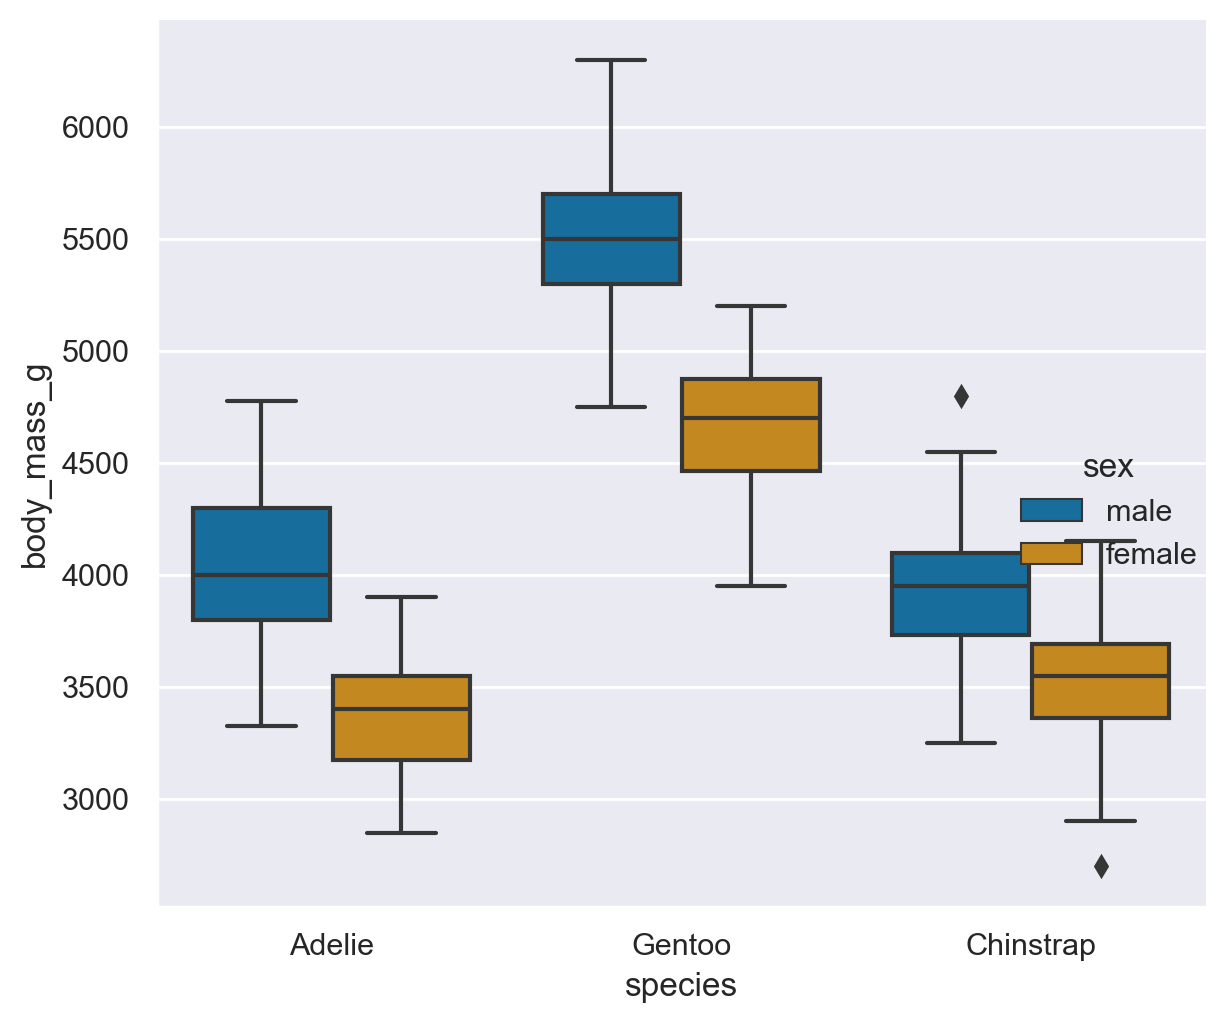

In [15]:
_ = sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="box")

Dai diagrammi risulta evidente che i pinguini maschi hanno un peso maggiore rispetto alle femmine in tutte le specie, e che i pinguini Gentoo hanno un peso superiore rispetto ad Adelie e Chinstrap.

Come alternativa, possiamo utilizzare il violinplot per la rappresentazione grafica dei dati.

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


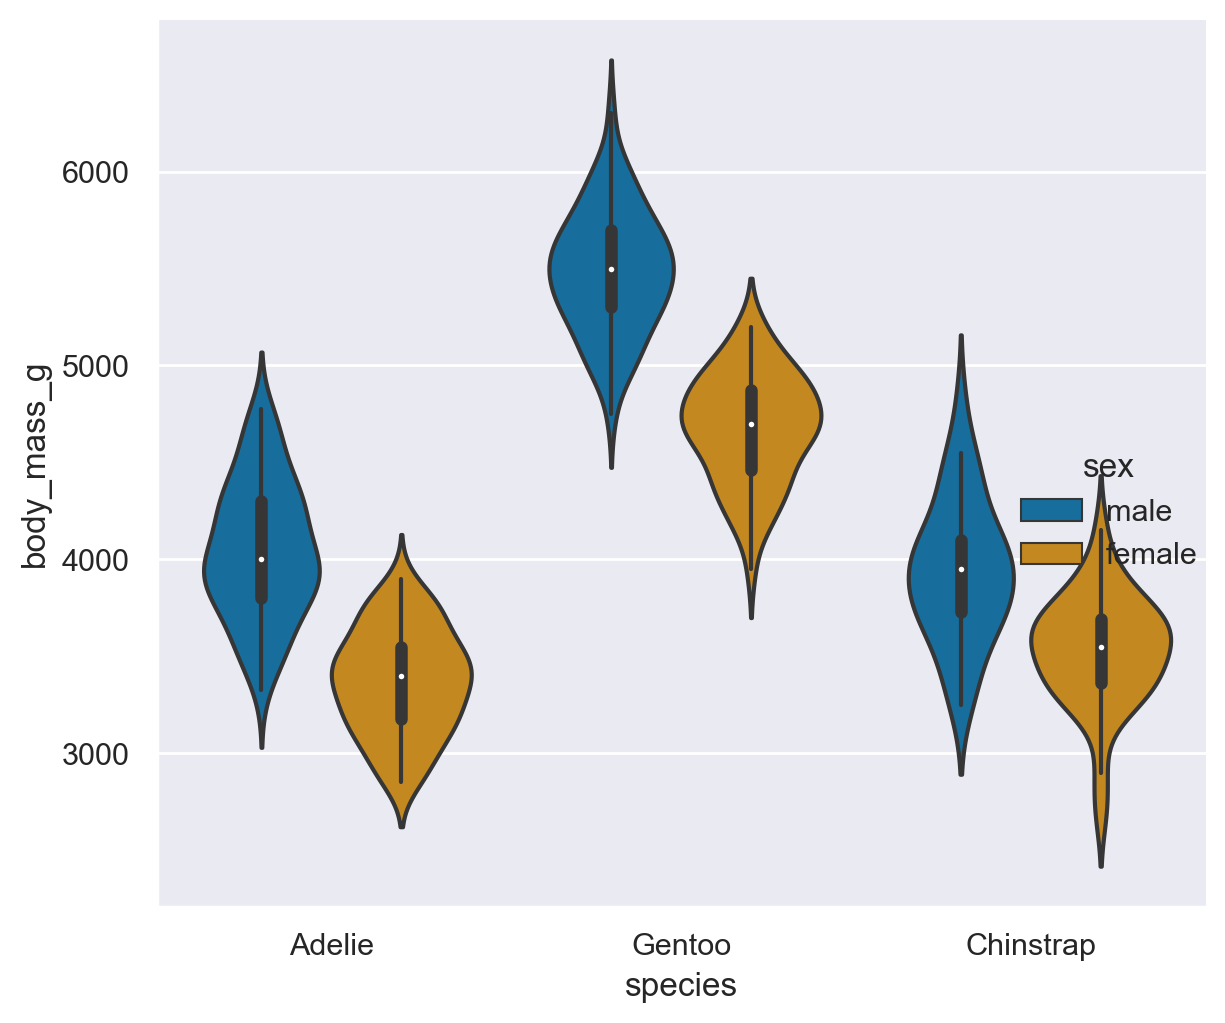

In [16]:
_ = sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="violin")

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


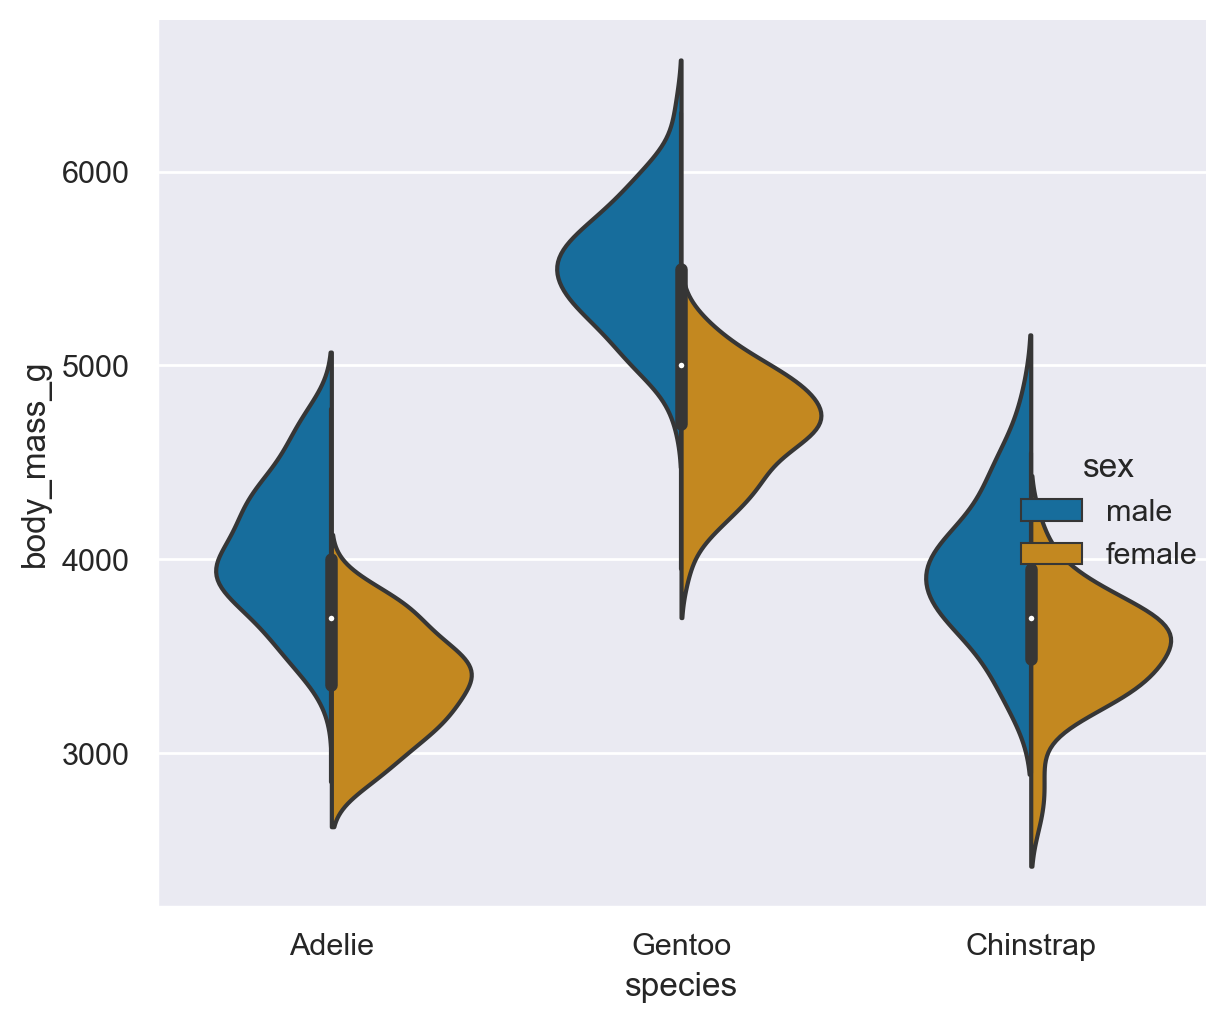

In [17]:
_ = sns.catplot(
    df,
    x="species",
    y="body_mass_g",
    hue="sex",
    kind="violin",
    split=True,
)

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [18]:
vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = df[vars].corr().round(2)
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


È più semplice leggere queste informazioni usando la seguente rappresentazione.

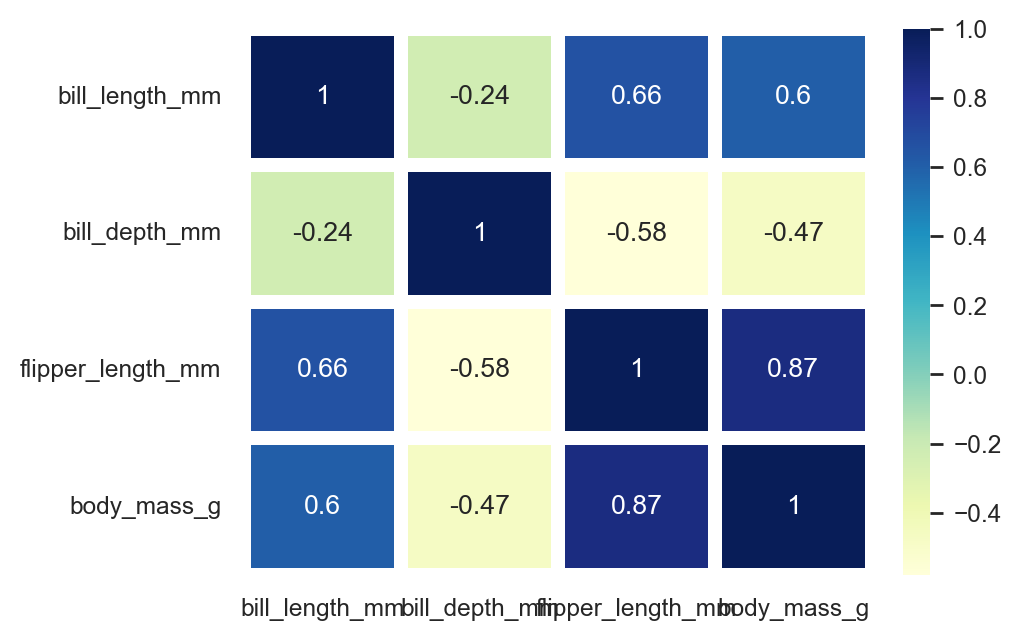

In [33]:
sns.heatmap(corr_matrix, annot=True, linecolor="white", linewidths=5, cmap="YlGnBu")

La lunghezza della pinna e la massa corporea mostrano un forte legame, con una correlazione di 0.87. Ciò indica che i pinguini con pinne più lunghe tendono a pesare di più.

Di seguito è riportato un esempio di diagramma a dispersione che illustra questa relazione.

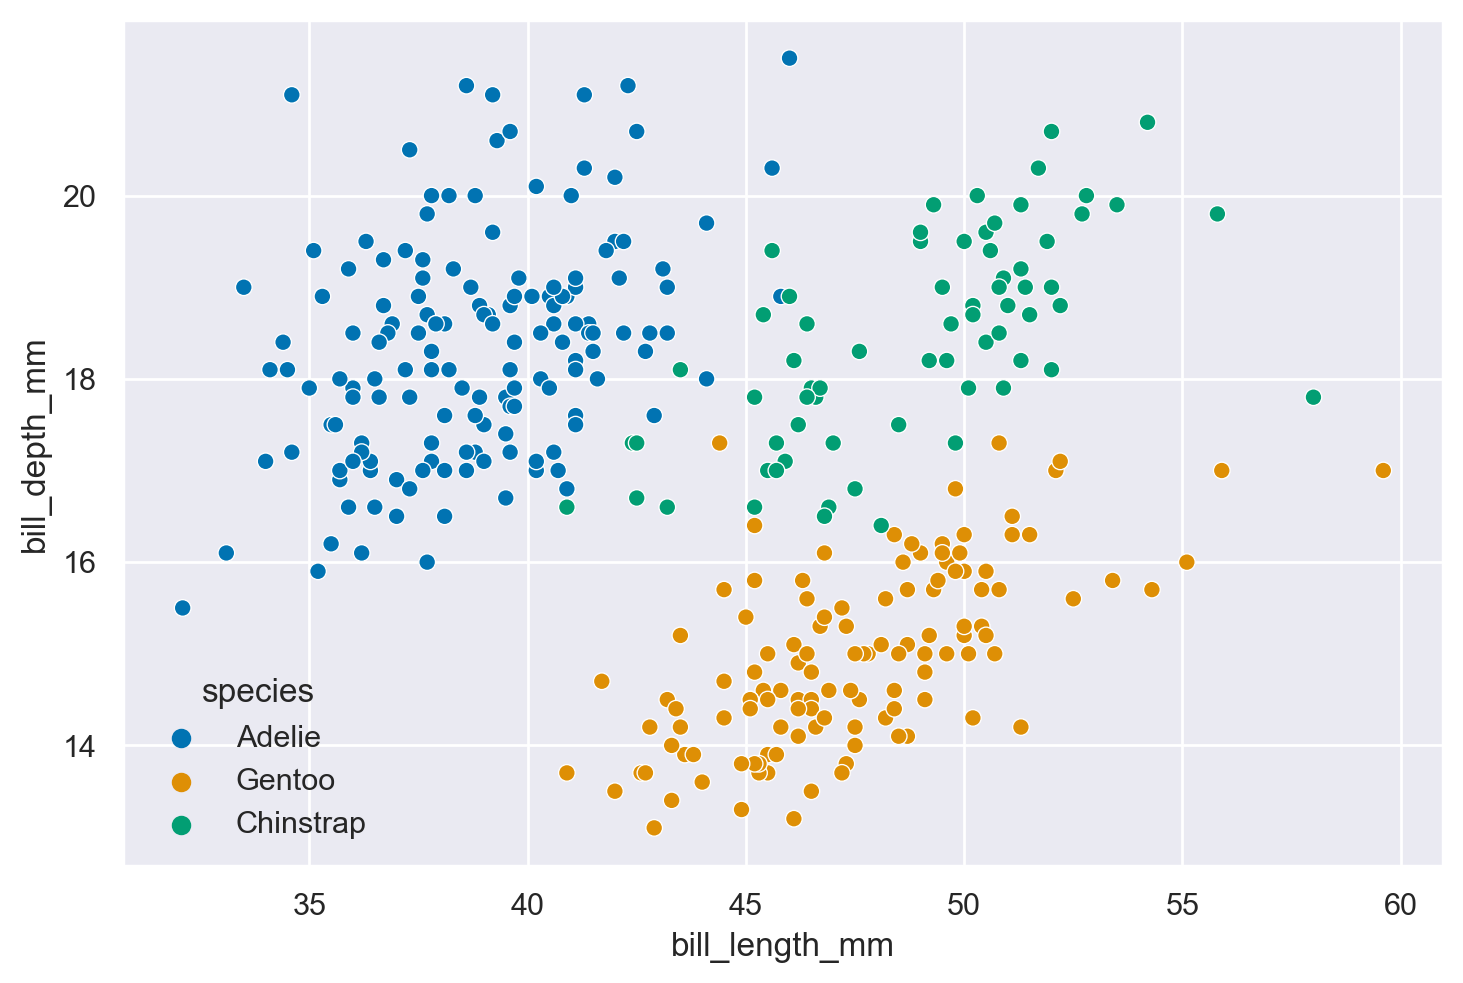

In [18]:
_ = sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species")

Evidentemente, le osservazioni delle tre specie formano cluster distinti. Per ciascuna specie, la lunghezza e la larghezza del becco presentano un intervallo specifico.

È vantaggioso creare grafici separati in base a diverse dimensioni dei dati; nell'esempio qui sotto, li suddivideremo in base all'isola di appartenenza:

/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/corrado/mambaforge/envs/pymc_env/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_52030/3153462515.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


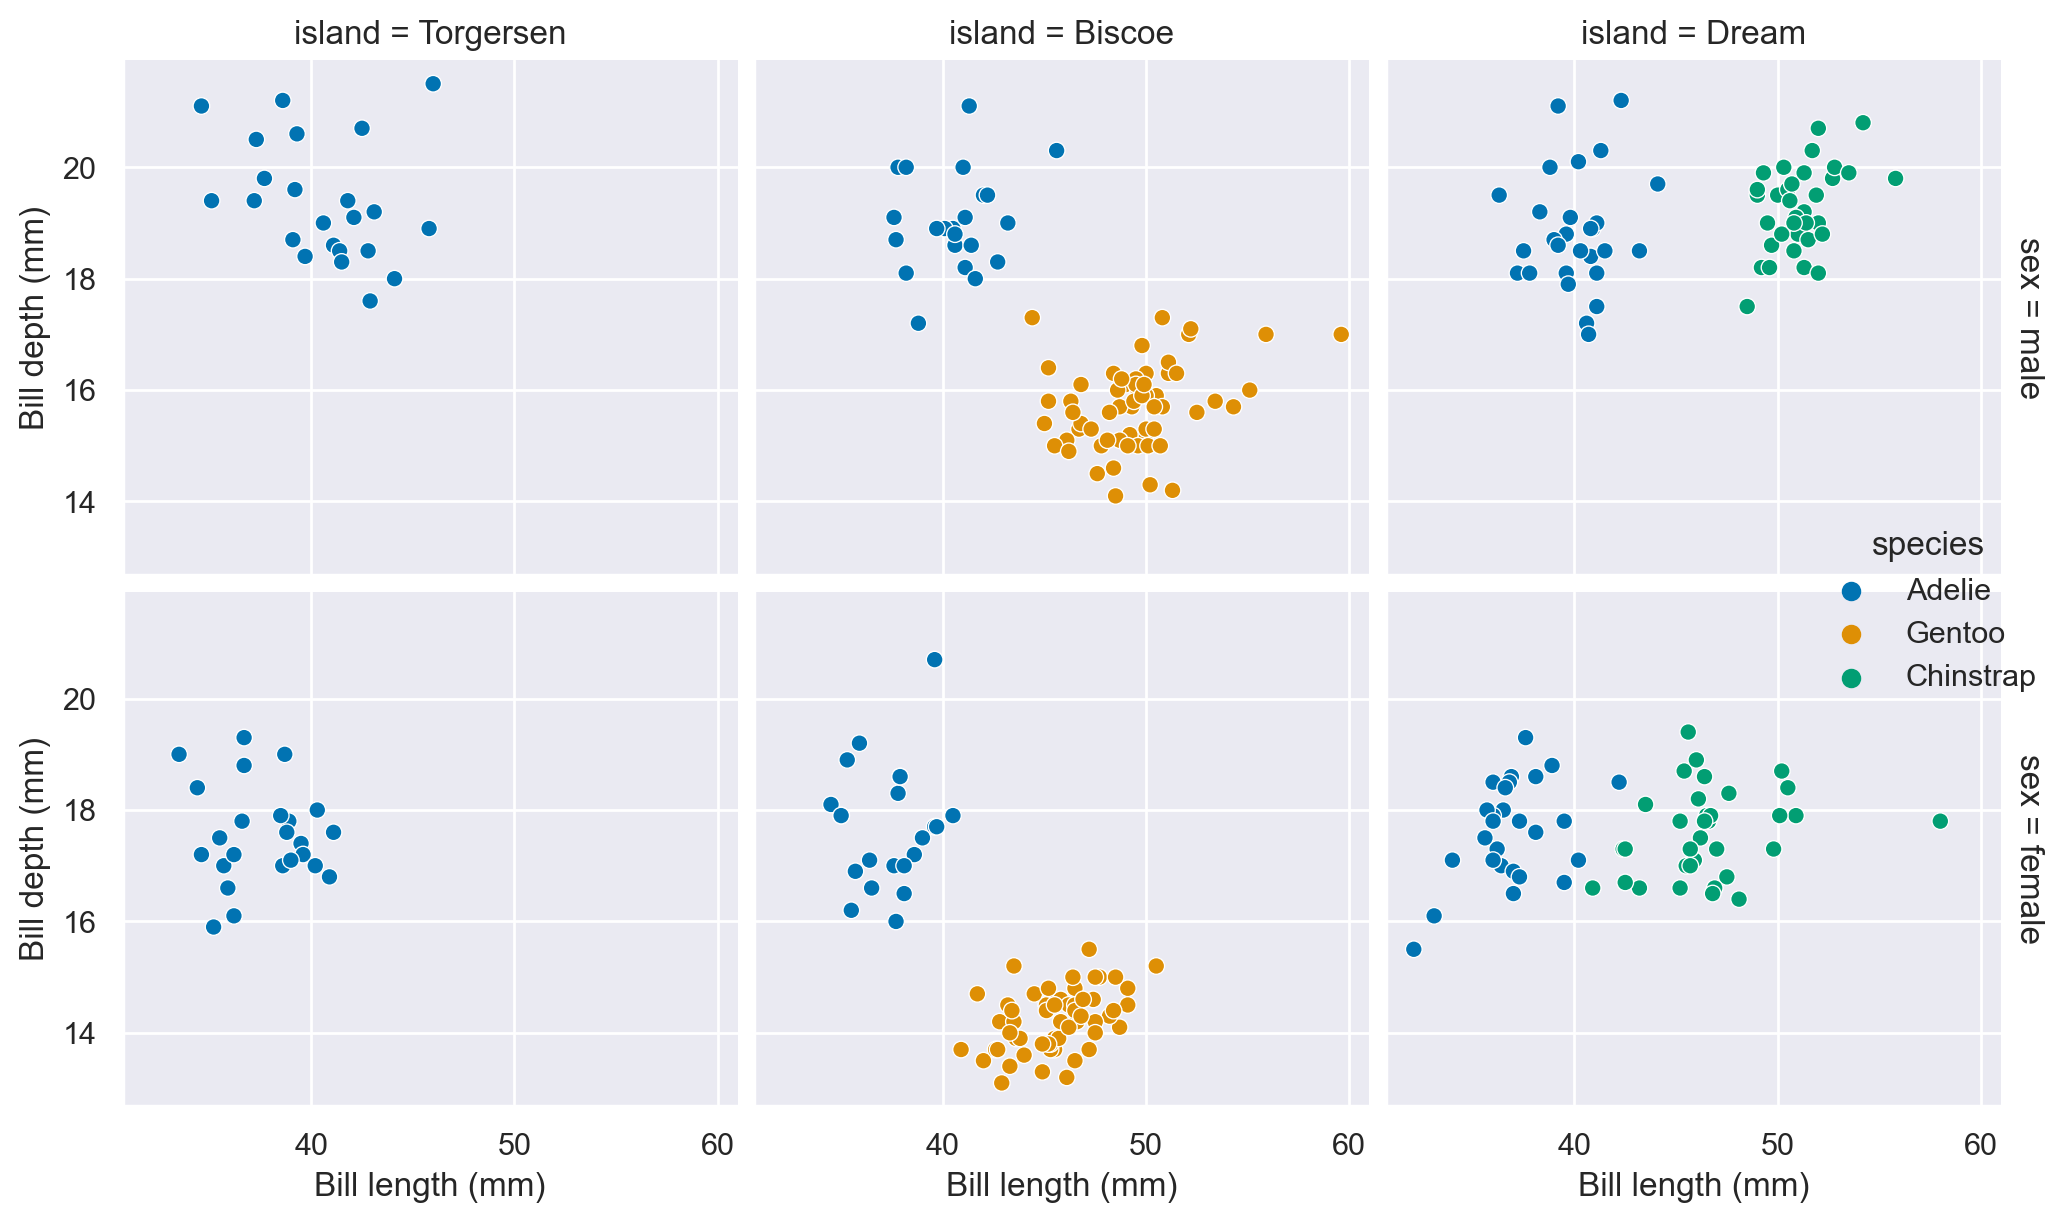

In [19]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    row="sex",
    col="island",
    height=3,
    facet_kws=dict(margin_titles=True),
)
g.set_axis_labels(
    "Bill length (mm)",
    "Bill depth (mm)",
)

## Watermark

In [3]:
%watermark -n -u -v -iv 

Last updated: Fri Jul 28 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.0

arviz     : 0.16.0
numpy     : 1.25.0
seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 1.5.3

